### Data Cleaning 

In [ ]:
cd /content/drive/MyDrive/Helmet_Head_Detection

/content/drive/MyDrive/Helmet_Head_Detection


In [ ]:
import os, os.path
import shutil, glob
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# !unzip /content/drive/MyDrive/Helmet_Head_Detection/HardHat_Test_Images.zip -d .

In [ ]:
dirs = ['annotations', 'images']
dir_path = '/content/drive/MyDrive/Hackathons/Wobot_Hack'
for dir in dirs:
    print("Number of {} file:\n".format(dir))
    print(len([name for name in os.listdir(os.path.join(dir_path, dir)) if os.path.isfile(os.path.join(dir_path, dir, name))]))
        


Number of annotations file:

4750
Number of images file:

4750


In [ ]:
filenames = []
for name in os.listdir('/content/drive/MyDrive/Hackathons/Wobot_Hack/images'):
    filenames.append(name)

In [ ]:
print(filenames)

['hard_hat_workers186.png', 'hard_hat_workers4537.png', 'hard_hat_workers1953.png', 'hard_hat_workers146.png', 'hard_hat_workers1886.png', 'hard_hat_workers368.png', 'hard_hat_workers951.png', 'hard_hat_workers362.png', 'hard_hat_workers4564.png', 'hard_hat_workers859.png', 'hard_hat_workers2624.png', 'hard_hat_workers3768.png', 'hard_hat_workers1889.png', 'hard_hat_workers2710.png', 'hard_hat_workers2531.png', 'hard_hat_workers1377.png', 'hard_hat_workers1850.png', 'hard_hat_workers765.png', 'hard_hat_workers628.png', 'hard_hat_workers3219.png', 'hard_hat_workers3730.png', 'hard_hat_workers3227.png', 'hard_hat_workers279.png', 'hard_hat_workers230.png', 'hard_hat_workers1836.png', 'hard_hat_workers4205.png', 'hard_hat_workers3573.png', 'hard_hat_workers3513.png', 'hard_hat_workers4168.png', 'hard_hat_workers4914.png', 'hard_hat_workers4918.png', 'hard_hat_workers76.png', 'hard_hat_workers689.png', 'hard_hat_workers4708.png', 'hard_hat_workers2381.png', 'hard_hat_workers4980.png', 'har

In [ ]:
#filenames = ['img_000.jpg', 'img_001.jpg', ...]
import random
filenames.sort()  # make sure that the filenames have a fixed order before shuffling
random.seed(230)
random.shuffle(filenames) # shuffles the ordering of filenames (deterministic given the chosen seed)

# split the train_data into 80:20
split_1 = int(0.8 * len(filenames))
#split_2 = int(0.9 * len(filenames))
train_filenames = filenames[:split_1]
val_filenames = filenames[split_1:]
#test_filenames = filenames[split_2:]

In [ ]:
print(train_filenames)

['hard_hat_workers1061.png', 'hard_hat_workers213.png', 'hard_hat_workers434.png', 'hard_hat_workers4696.png', 'hard_hat_workers621.png', 'hard_hat_workers1160.png', 'hard_hat_workers4016.png', 'hard_hat_workers4376.png', 'hard_hat_workers1634.png', 'hard_hat_workers4835.png', 'hard_hat_workers1542.png', 'hard_hat_workers2421.png', 'hard_hat_workers536.png', 'hard_hat_workers3465.png', 'hard_hat_workers3592.png', 'hard_hat_workers682.png', 'hard_hat_workers2247.png', 'hard_hat_workers2452.png', 'hard_hat_workers2104.png', 'hard_hat_workers534.png', 'hard_hat_workers2585.png', 'hard_hat_workers1204.png', 'hard_hat_workers2565.png', 'hard_hat_workers165.png', 'hard_hat_workers3228.png', 'hard_hat_workers4253.png', 'hard_hat_workers2920.png', 'hard_hat_workers755.png', 'hard_hat_workers2141.png', 'hard_hat_workers1831.png', 'hard_hat_workers2.png', 'hard_hat_workers2154.png', 'hard_hat_workers2025.png', 'hard_hat_workers251.png', 'hard_hat_workers4881.png', 'hard_hat_workers3509.png', 'ha

In [ ]:
# names of images contains in train_filenames
img_names = []

for img in train_filenames:
    img = img.split('.')[0]
    img_names.append(img)

In [ ]:
print(img_names)

['hard_hat_workers1061', 'hard_hat_workers213', 'hard_hat_workers434', 'hard_hat_workers4696', 'hard_hat_workers621', 'hard_hat_workers1160', 'hard_hat_workers4016', 'hard_hat_workers4376', 'hard_hat_workers1634', 'hard_hat_workers4835', 'hard_hat_workers1542', 'hard_hat_workers2421', 'hard_hat_workers536', 'hard_hat_workers3465', 'hard_hat_workers3592', 'hard_hat_workers682', 'hard_hat_workers2247', 'hard_hat_workers2452', 'hard_hat_workers2104', 'hard_hat_workers534', 'hard_hat_workers2585', 'hard_hat_workers1204', 'hard_hat_workers2565', 'hard_hat_workers165', 'hard_hat_workers3228', 'hard_hat_workers4253', 'hard_hat_workers2920', 'hard_hat_workers755', 'hard_hat_workers2141', 'hard_hat_workers1831', 'hard_hat_workers2', 'hard_hat_workers2154', 'hard_hat_workers2025', 'hard_hat_workers251', 'hard_hat_workers4881', 'hard_hat_workers3509', 'hard_hat_workers826', 'hard_hat_workers2964', 'hard_hat_workers2137', 'hard_hat_workers3505', 'hard_hat_workers2087', 'hard_hat_workers449', 'hard

In [ ]:
# making list of train xmls and validation xmls respective to train images and validation images
annotation_train = []
annotation_val = []
for annotation in os.listdir('/content/drive/MyDrive/Hackathons/Wobot_Hack/annotations'):
    annotation_name = annotation.split('.')[0]
    if annotation_name in img_names:
        annotation_train.append(annotation)
    else:
        annotation_val.append(annotation)


In [ ]:
print(annotation_train)

['hard_hat_workers0.xml', 'hard_hat_workers1.xml', 'hard_hat_workers100.xml', 'hard_hat_workers1001.xml', 'hard_hat_workers1002.xml', 'hard_hat_workers1005.xml', 'hard_hat_workers1007.xml', 'hard_hat_workers1008.xml', 'hard_hat_workers1009.xml', 'hard_hat_workers1010.xml', 'hard_hat_workers1012.xml', 'hard_hat_workers1014.xml', 'hard_hat_workers1016.xml', 'hard_hat_workers1017.xml', 'hard_hat_workers1019.xml', 'hard_hat_workers102.xml', 'hard_hat_workers1020.xml', 'hard_hat_workers1021.xml', 'hard_hat_workers1022.xml', 'hard_hat_workers1023.xml', 'hard_hat_workers1024.xml', 'hard_hat_workers1025.xml', 'hard_hat_workers1028.xml', 'hard_hat_workers1029.xml', 'hard_hat_workers1030.xml', 'hard_hat_workers1032.xml', 'hard_hat_workers1033.xml', 'hard_hat_workers1034.xml', 'hard_hat_workers1035.xml', 'hard_hat_workers1036.xml', 'hard_hat_workers1037.xml', 'hard_hat_workers1038.xml', 'hard_hat_workers1039.xml', 'hard_hat_workers104.xml', 'hard_hat_workers1040.xml', 'hard_hat_workers1041.xml', 

In [ ]:
#!mkdir train_data

In [ ]:
pwd

'/content'

In [ ]:
#!mkdir val_data

In [ ]:
#copy the img to train_data folder
src_dir = "/content/drive/MyDrive/Hackathons/Wobot_Hack/images"
dst_dir = "/content/train_data"
for filename in train_filenames:
    for jpgfile in glob.iglob(os.path.join(src_dir, filename)):
        shutil.copy(jpgfile, dst_dir)

In [ ]:
#copy the xml to train_data folder
src_dir = "/content/drive/MyDrive/Hackathons/Wobot_Hack/annotations"
dst_dir = "/content/train_data"
for filename in annotation_train:
    for annotfile in glob.iglob(os.path.join(src_dir, filename)):
        shutil.copy(annotfile, dst_dir)

In [ ]:
#copy the img to val_data folder
src_dir = "/content/drive/MyDrive/Hackathons/Wobot_Hack/images"
dst_dir = "/content/val_data"
for filename in val_filenames:
    for jpgfile in glob.iglob(os.path.join(src_dir, filename)):
        shutil.copy(jpgfile, dst_dir)

In [ ]:
#copy the xmls to val_data folder
src_dir = "/content/drive/MyDrive/Hackathons/Wobot_Hack/annotations"
dst_dir = "/content/val_data"
for filename in annotation_val:
    for annotfile in glob.iglob(os.path.join(src_dir, filename)):
        shutil.copy(annotfile, dst_dir)

In [ ]:
DIR = '/content/train_data'
print("Total train files:\n")
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

7600


In [ ]:
DIR = '/content/val_data'
print("Total val files:\n")
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1900


In [ ]:
def xml_to_csv(path):
    """Iterates through all .xml files (generated by labelImg) in a given directory and combines
    them in a single Pandas dataframe.

    Parameters:
    ----------
    path : str
        The path containing the .xml files
    Returns
    -------
    Pandas DataFrame
        The produced dataframe
    """

    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[5][0].text),
                     int(member[5][1].text),
                     int(member[5][2].text),
                     int(member[5][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
df = xml_to_csv('/content/drive/MyDrive/Helmet_Head_Detection/images/train')

In [ ]:
df_val = xml_to_csv('/content/drive/MyDrive/Helmet_Head_Detection/images/test')

In [ ]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,hard_hat_workers4264.png,416,415,helmet,169,70,298,204
1,hard_hat_workers4264.png,416,415,helmet,168,0,298,69
2,hard_hat_workers4031.png,416,416,helmet,76,136,96,160
3,hard_hat_workers4031.png,416,416,helmet,187,130,216,175
4,hard_hat_workers4031.png,416,416,helmet,186,0,216,9


In [ ]:
#save the csv file
df.to_csv('train-labels.csv')

In [ ]:
df_val.to_csv('test-labels.csv')

In [ ]:
df_val.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,hard_hat_workers3479.png,416,416,helmet,38,214,128,303
1,hard_hat_workers3479.png,416,416,helmet,229,213,285,295
2,hard_hat_workers3479.png,416,416,helmet,38,387,129,415
3,hard_hat_workers3479.png,416,416,helmet,229,395,286,415
4,hard_hat_workers2965.png,416,415,helmet,171,76,215,125


In [ ]:
df.shape, df_val.shape

((18085, 8), (4777, 8))

In [ ]:
df['class'].value_counts()

helmet    13939
head       4146
Name: class, dtype: int64

In [ ]:
df_val['class'].value_counts()

helmet    3472
head      1305
Name: class, dtype: int64

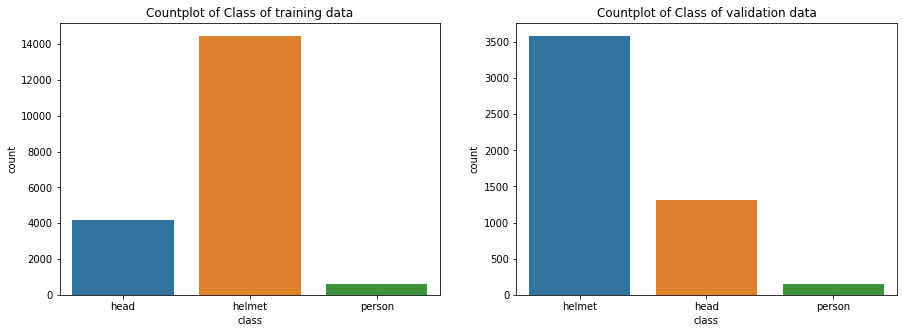

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x = 'class', data = df, ax=ax[0])
sns.countplot(x = 'class', data = df_val, ax=ax[1])
ax[0].set_title("Countplot of Class of training data")
ax[1].set_title("Countplot of Class of validation data")
plt.show()

In [ ]:
# as per our problem statement we have to detect only head and helmet
# so we can remove images having annotations for person class
person = df[df['class'] == 'person']['filename'].unique()

person_val = df_val[df_val['class'] == 'person']['filename'].unique()

In [ ]:
person.shape, person_val.shape

((126,), (27,))

In [ ]:
os.path.join(dir_path, file)

In [ ]:
dir_path = '/content/train_data'
for file in list(person):
    if os.path.isfile(dir_path+'/'+file):
        #print(dir_path+'/'+file)
        os.remove(dir_path+'/'+file)
        xml_file = file.split('.')[0]
        #print(dir_path+'/'+ xml_file +'.xml')
        os.remove(dir_path+'/'+ xml_file +'.xml')



In [ ]:
dir_path = '/content/val_data'
for file in list(person_val):
    if os.path.isfile(dir_path+'/'+file):
        #print(dir_path+'/'+file)
        os.remove(dir_path+'/'+file)
        xml_file = file.split('.')[0]
        #print(dir_path+'/'+ xml_file +'.xml')
        os.remove(dir_path+'/'+ xml_file +'.xml')

In [ ]:
DIR = '/content/train_data'
print("Total train files after removing images having person class:\n")
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

Total train files after removing images having person class:

7348


In [ ]:
DIR = '/content/val_data'
print("Total validation files after removing images having person class:\n")
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

Total validation files after removing images having person class:

1846


In [ ]:
#shutil.move("/content/train_data", "/content/drive/MyDrive/Hackathons/Wobot_Hack")

'/content/drive/MyDrive/Hackathons/Wobot_Hack/train_data'

In [ ]:
#shutil.move("/content/val_data", "/content/drive/MyDrive/Hackathons/Wobot_Hack")

'/content/drive/MyDrive/Hackathons/Wobot_Hack/val_data'

In [ ]:
DIR = '/content/drive/MyDrive/Hackathons/Wobot_Hack/train_data'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

7348


In [ ]:
DIR = '/content/drive/MyDrive/Hackathons/Wobot_Hack/val_data'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1846


### Write a text file

In [ ]:
files = list()
for filename in df_val.filename:
    files.append(filename.split('.')[0])

In [ ]:
len(files)

4777

In [ ]:
files
with open('test.txt', 'w') as f:
    f.write('\n'.join(files))

### Read a File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Helmet_Head_Detection/annotations

/content/drive/MyDrive/Helmet_Head_Detection/annotations


In [ ]:
data = pd.read_csv('train-labels.csv', index_col=['Unnamed: 0'])
data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,hard_hat_workers4264.png,416,415,helmet,169,70,298,204
1,hard_hat_workers4264.png,416,415,helmet,168,0,298,69
2,hard_hat_workers4031.png,416,416,helmet,76,136,96,160
3,hard_hat_workers4031.png,416,416,helmet,187,130,216,175
4,hard_hat_workers4031.png,416,416,helmet,186,0,216,9


In [ ]:
data['class'].value_counts()

helmet    13939
head       4146
Name: class, dtype: int64

In [ ]:
test_img = '/content/drive/MyDrive/Helmet_Head_Detection/Images'

print("Total test img files contain in folder:\n")
print(len([img_file for img_file in glob.glob(test_img + '/*.png')]))

Total test img files contain in folder:

250


In [ ]:
from xml.dom import minidom
import os 

In [ ]:
root = minidom.Document()
  
xml = root.createElement('folder') 
root.appendChild(xml)
  
productChild = root.createElement('product')
productChild.setAttribute('name', 'Geeks for Geeks')
  
xml.appendChild(productChild)
  
xml_str = root.toprettyxml(indent ="\t") 
  
save_path_file = "gfg.xml"
  
with open(save_path_file, "w") as f:
    f.write(xml_str)

In [ ]:
import xml.etree.ElementTree as gfg 

from bs4 import BeautifulSoup  

def GenerateXML(fileName) :
      
    root = gfg.Element("annotation")
      
    m1 = gfg.Element("folder")
    m1.text = 'images'
    root.append (m1)
      
    b1 = gfg.Element('filename')
    b1.text = "hard_hat_workers1.png"
    root.append (b1)

    b2 = gfg.Element('size')
    b20 = gfg.SubElement(b2, "width")
    b20.text = "416"

    b21 = gfg.SubElement(b2, "height")
    b21.text = "416"

    b22 = gfg.SubElement(b2, "depth")
    b22.text = "3"
    root.append (b2)

    b3 = gfg.Element('segmented')
    b3.text = "0"
    root.append (b3)

    b4 = gfg.Element('object')
    b41 = gfg.SubElement(b4, "name")
    b41.text = "helmet"

    b42 = gfg.SubElement(b4, "pose")
    b42.text = "Unspecified"

    b43 = gfg.SubElement(b4, "truncated")
    b43.text = "0"

    b44 = gfg.SubElement(b4, "occluded")
    b44.text = "0"

    b45 = gfg.SubElement(b4, "difficult")
    b45.text = "0"

    b46 = gfg.SubElement(b4, "bndbox")
    b461 = gfg.SubElement(b46, "xmin")
    b461.text = "116"

    b462 = gfg.SubElement(b46, "ymin")
    b462.text = "230"

    b463 = gfg.SubElement(b46, "xmax")
    b463.text = "141"

    b464 = gfg.SubElement(b46, "xmin")
    b464.text = "252"
    
    root.append (b4)
      
    tree = gfg.ElementTree(root)


      
    with open (fileName, "wb") as files :
        tree.write(files)
  
# Driver Code
if __name__ == "__main__": 
    GenerateXML("xml-practice1.xml")

In [ ]:
<object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>116</xmin>
            <ymin>230</ymin>
            <xmax>141</xmax>
            <ymax>252</ymax>
        </bndbox>
    </object>
